In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv('drag_curves.csv')

data.fillna(0.0)

,v1,d1,v2,d2,v3,d3,v4,d4,v5,d5
0,4597.12589,52.48519,4282.55648,32.60970,4282.55648,33.53610,3201.22412,33.28345,3201.22412,22.16665
1,4597.12589,51.97988,4282.55648,33.03079,4282.55648,33.11501,3201.22412,32.86236,3207.77765,21.74556
2,4636.44706,51.64300,4282.55648,33.45188,4308.77059,32.94657,3220.88471,32.60970,3240.54530,21.82978
3,4675.76824,51.64300,4256.34236,32.94657,4341.53824,32.94657,3253.65236,32.86236,3273.31295,21.82978
4,4715.08942,51.64300,4223.57471,32.94657,4374.30589,32.94657,3286.42001,32.94657,3306.08059,21.91400
...,...,...,...,...,...,...,...,...,...,...
224,0.00000,0.00000,7474.12529,8.01800,0.00000,0.00000,0.00000,0.00000,5934.04588,10.37611
225,0.00000,0.00000,7506.89294,7.84957,0.00000,0.00000,0.00000,0.00000,6137.20530,8.94440
226,0.00000,0.00000,7513.44647,8.27066,0.00000,0.00000,0.00000,0.00000,6333.81118,7.42847
227,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6327.25765,7.00738


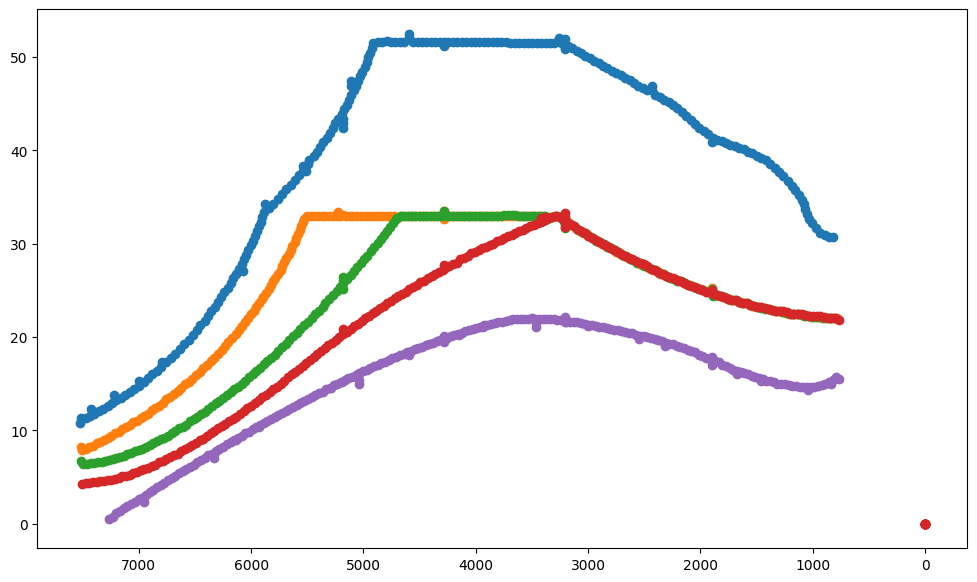

In [7]:
v_columns = [col for col in data.columns if col.startswith('v')]
d_columns = [col for col in data.columns if col.startswith('d')]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax

plt_.invert_xaxis()

for v_col, d_col in zip(v_columns, d_columns):

    v_array = np.nan_to_num(data[v_col].to_numpy(), nan = 0)
    d_array = np.nan_to_num(data[d_col].to_numpy(), nan = 0)
    

    plt1 = plt_.scatter(v_array, d_array)
    
#img = plt.imread("drag.png")
#plt_.imshow(img, aspect='auto', extent=[7620, 0, 0, 60], alpha=1, cmap='Greys_r')

In [58]:
v_columns = [col for col in data.columns if col.startswith('v')]
d_columns = [col for col in data.columns if col.startswith('d')]

def traj_disp_new(n, data):
    if n==1:
        
        r_speed = (5500, 7800)
        drag_datums = [6, 10, 15, 20, 25, 35, 45]

    elif n==2:
        r_speed = (4330, 5500)
        drag_datums = [20, 25, 35, 45]

    elif n==3:
        r_speed = (3400, 4330)
        drag_datums = [25, 35, 45]

    elif n==4:
        r_speed = (1950, 3400)
        drag_datums = [20, 30, 40]

    elif n==5:
        r_speed = (300, 1950)
        drag_datums = [20, 30, 40]
        

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    
    for v_col, d_col in zip(v_columns, d_columns):
        
        disp_data = data[(data[v_col].between(*r_speed))][[v_col, d_col]]
        
        v_array = disp_data[v_col].to_numpy()
        d_array = disp_data[d_col].to_numpy()

        traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(v_array, d_array)])
        traj_y = np.array([traj_y_convert_new(n, v) for v in v_array])
        
        plt1 = plt_.scatter(traj_x, traj_y, s=10)

    drag_v = np.linspace(r_speed[0], r_speed[1], 200)
    
    for dval in drag_datums:
        drag_l_x = np.array([traj_x_convert_new(n, drag_v, dval) for v, d in zip(v_array, d_array)])
        drag_l_y = np.array([traj_y_convert_new(n, drag_v) for v in v_array])
        plt1 = plt_.scatter(drag_l_x, drag_l_y, s=1, c='k')

    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 555.3926783243992 + 0.137078652046288 * vel**1 * drag**0 + -94.72561947028342 * vel**0 * drag**1 + -3.344538192253144e-05 * vel**2 * drag**0 + 0.00906907118021625 * vel**1 * drag**1 + 1.8200934250524303 * vel**0 * drag**2 + 2.3076131838717373e-09 * vel**3 * drag**0 + -3.512244427130015e-07 * vel**2 * drag**1 + -5.082702175883116e-05 * vel**1 * drag**2 + -0.014714191410748175 * vel**0 * drag**3
        #return 556.7332824014602 + -0.04209415269774057 * vel**1 * drag**0 + -32.55273184833307 * vel**0 * drag**1 + 5.214402001192664e-06 * vel**2 * drag**0 + 0.0015954337395696246 * vel**1 * drag**1 + 0.25991212242109135 * vel**0 * drag**2
    
    elif n==2:
        return -38.0268152009462 + 0.09906578419425373 * vel**1 * drag**0 + -12.707084859116666 * vel**0 * drag**1 + 1.3305326295037778e-06 * vel**2 * drag**0 + 0.0011766877774739082 * vel**1 * drag**1 + -0.014838331795402771 * vel**0 * drag**2
    elif n==3:
        return -531.1596833649385 + 0.2369508010818678 * vel**1 * drag**0 + -0.7771572651359938 * vel**0 * drag**1 + -2.1586890749936138e-07 * vel**2 * drag**0 + 0.00021100580946806138 * vel**1 * drag**1 + -0.1132059499998106 * vel**0 * drag**2
    elif n==4:
        return -748.4063596835092 + 0.7408869827508833 * vel**1 * drag**0 + -13.833348494044804 * vel**0 * drag**1 + -8.626522934807035e-05 * vel**2 * drag**0 + 2.9372518671475292e-05 * vel**1 * drag**1 + 0.10761028181794845 * vel**0 * drag**2
    elif n==5:
        return -776.3651212085673 + 1.0608120994108508 * vel**1 * drag**0 + -0.0012408627622487007 * vel**0 * drag**1 + -0.000190689080882267 * vel**2 * drag**0 + -0.0018267317853930109 * vel**1 * drag**1 + -0.062043138111733405 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (-0.1187007912 * vel + 966.857 + 32.7)
    elif n==2:
        out = (-0.23731299972 * vel + 1342.6666 + 32.7)
    elif n==3:
        out = (-0.255413394 * vel + 1170 + 32.7)
    elif n==4:
        out = (-0.171587932 * vel + 639 + 32.7)
    elif n==5:
        out = (-0.2568241552 * vel + 565.714 + 32.7)

    return  50 - (out - 350)
    
#traj_bounds= [[0, 500], [50, 350]]

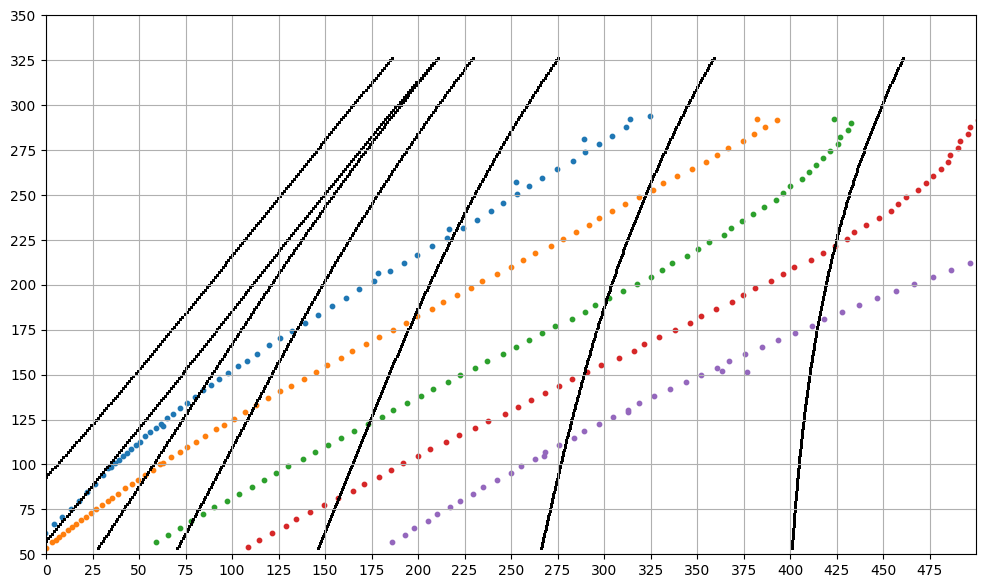

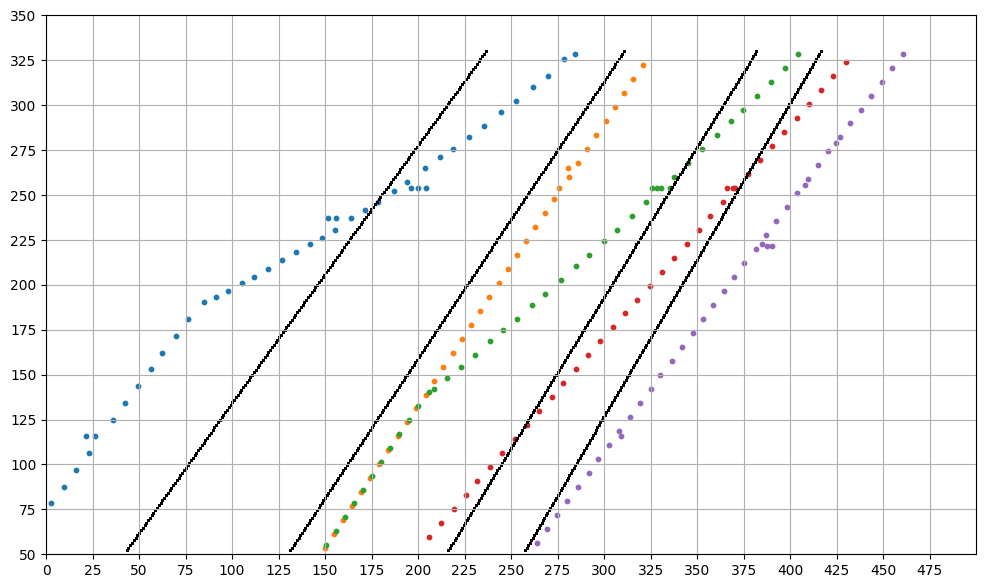

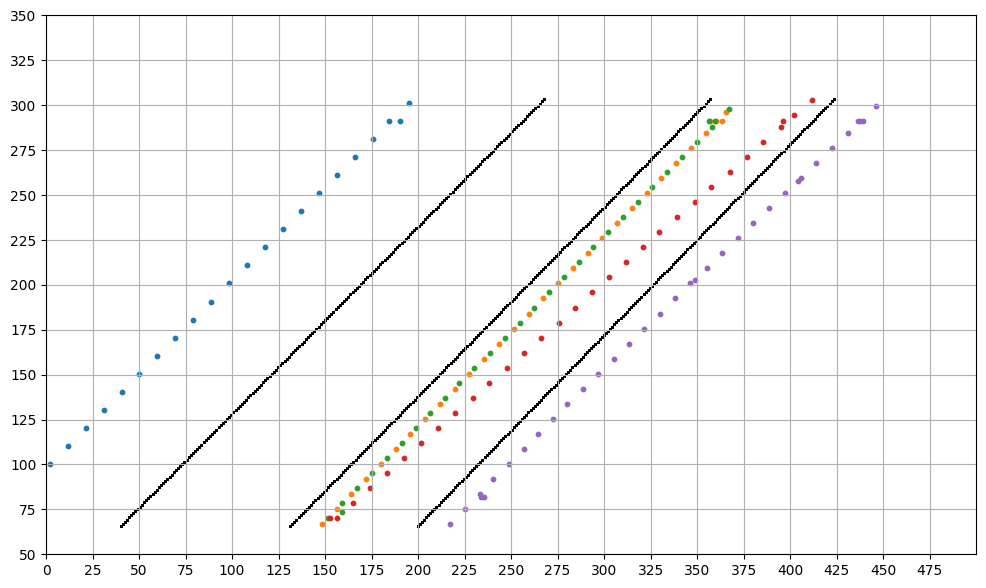

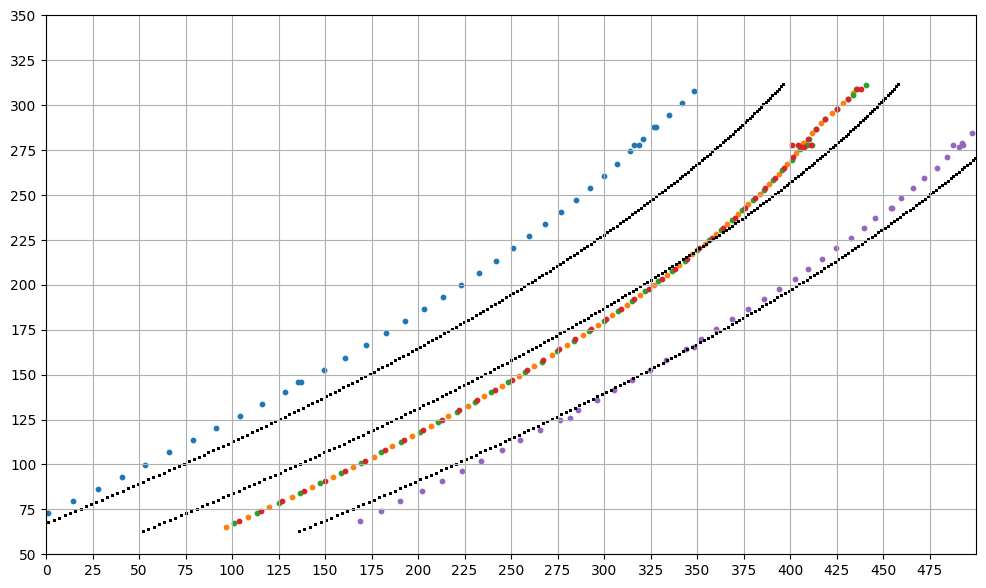

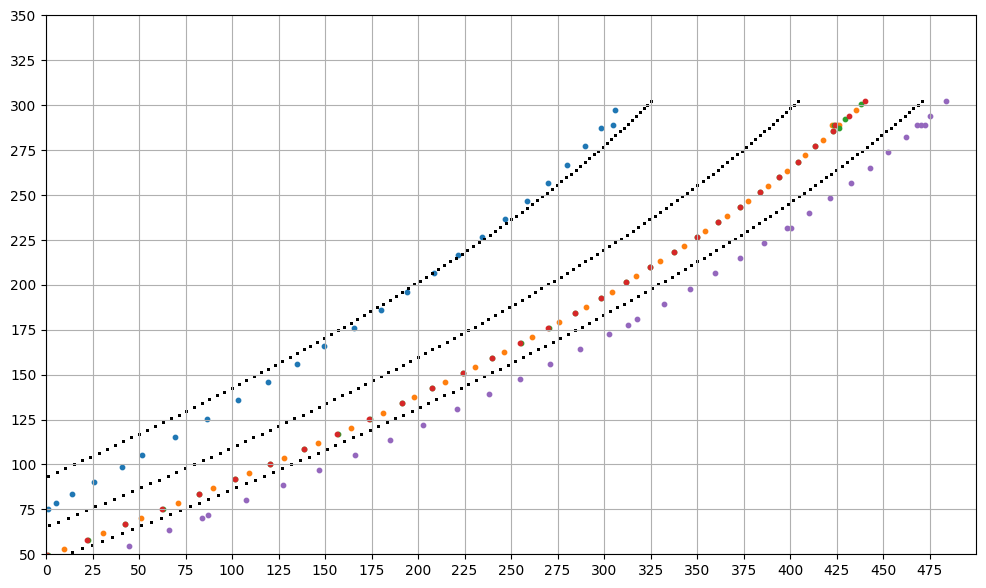

In [59]:
traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)